In [44]:
import requests
import pandas as pd

import numpy as np # library to handle data in a vectorized manner
import requests

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab
usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


<h2>Reading in data scraped in from  the table in https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M in csv format </h2>

In [45]:
df = pd.read_excel(r"C:\Users\mr.Vinn\Downloads\convertcsv.xlsx")
df.head()
df.describe()

,Postal Code,Borough,Neighborhood
count,180,180,180
unique,180,11,100
top,M3S,Not assigned,Not assigned
freq,1,77,77


<h2>Importing data from provisioned link to a csv file containing geographical coordinates of each postal code</h2>

In [46]:
geo_df=pd.read_csv("http://cocl.us/Geospatial_data",delimiter=",")

<h2>Filtering out cells with a borough that is 'Not assigned'</h2>

In [47]:
df_filtered = df[df['Borough'] != 'Not assigned']
df_filtered.describe()

,Postal Code,Borough,Neighborhood
count,103,103,103
unique,103,10,99
top,M8W,North York,Downsview
freq,1,24,4


In [48]:
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [88]:
hoods = pd.merge(geo_df,df_filtered, on='Postal Code')
# hoods[result['Postal Code'] == 'M5G']
hoods.head(10)

,Postal Code,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae
5,M1J,43.744734,-79.239476,Scarborough,Scarborough Village
6,M1K,43.727929,-79.262029,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,43.711112,-79.284577,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,43.716316,-79.239476,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,43.692657,-79.264848,Scarborough,"Birch Cliff, Cliffside West"


In [89]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(hoods['Borough'].unique()),
        hoods.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


<h2>Using geopy library to get the latitude and longitude values of Toronto</h2>

In [132]:
address = 'Paris, FR'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 48.8566969, 2.3514616.


In [133]:
# create map of Toronto using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(hoods['Latitude'],hoods['Longitude'], hoods['Borough'], hoods['Neighborhood']):
    label = '{}, {}'.format(hoods, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### simplifying the above map to segment and cluster only the neighborhoods in Downtown Toronto.
#### Slicing the original dataframe and create a new dataframe of the Downtown Toronto data.

In [92]:
toronto_data = hoods[hoods['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
toronto_data.head()

,Postal Code,Latitude,Longitude,Borough,Neighborhood
0,M4W,43.679563,-79.377529,Downtown Toronto,Rosedale
1,M4X,43.667967,-79.367675,Downtown Toronto,"St. James Town, Cabbagetown"
2,M4Y,43.665860,-79.383160,Downtown Toronto,Church and Wellesley
3,M5A,43.654260,-79.360636,Downtown Toronto,"Regent Park, Harbourfront"
4,M5B,43.657162,-79.378937,Downtown Toronto,"Garden District, Ryerson"


In [130]:
address = 'Paris,FR'

geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are latitude: {} and longitude:{}.'.format(address,latitude, longitude))

The geograpical coordinates of Paris,FR are latitude: 48.8566969 and longitude:2.3514616.


## Visualizing Downtown Toronto the neighborhood with red markers.

In [131]:
map_DT = folium.Map(location=[latitude, longitude], zoom_start=30)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#ff1111',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Utilizing the Foursquare API to explore the neighborhoods and segment them.

In [56]:
CLIENT_ID = 'UNQQZURMW53WEG4NIEAKFUMNBHDWO5Q4MVPLX3TR1WKZPQYK' # your Foursquare ID
CLIENT_SECRET = 'KF21BVV5MJC0IUBLOMTWSQS1XJMUUY5VDOKCKOIWDLVO0CQ3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('CREDENTIALS:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CREDENTIALS:
CLIENT_ID: UNQQZURMW53WEG4NIEAKFUMNBHDWO5Q4MVPLX3TR1WKZPQYK
CLIENT_SECRET:KF21BVV5MJC0IUBLOMTWSQS1XJMUUY5VDOKCKOIWDLVO0CQ3


### Finding third neighborhhod name

In [94]:
toronto_data.loc[2, 'Neighborhood']

'Church and Wellesley'

## Finding Church and Wellesley geolocation

In [95]:
neighborhood_latitude = toronto_data.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[2, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[2, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Church and Wellesley are 43.6658599, -79.38315990000001.


#### Getting venues that are in Church and Wellesley within a radius of 500 meters.

In [96]:
radius = 500 
LIMIT = 50 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=UNQQZURMW53WEG4NIEAKFUMNBHDWO5Q4MVPLX3TR1WKZPQYK&client_secret=KF21BVV5MJC0IUBLOMTWSQS1XJMUUY5VDOKCKOIWDLVO0CQ3&v=20180605&ll=43.6658599,-79.38315990000001&radius=500&limit=50'

In [97]:
results = requests.get(url).json()
# results

In [61]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [99]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(15)

,name,categories,lat,lng
0,Storm Crow Manor,Theme Restaurant,43.666840,-79.381593
1,DanceLifeX Centre,Dance Studio,43.666956,-79.385297
2,Como En Casa,Mexican Restaurant,43.665160,-79.384796
3,The Alley,Bubble Tea Shop,43.665922,-79.385567
4,Fabarnak,Restaurant,43.666377,-79.380964
5,Bar Volo,Beer Bar,43.665462,-79.385692
6,Smith,Breakfast Spot,43.666927,-79.381421
7,Barbara Hall Park,Park,43.666879,-79.381068
8,Sansotei Ramen 三草亭,Ramen Restaurant,43.666735,-79.385353
9,Hero Certified Burgers,Burger Joint,43.665624,-79.380904


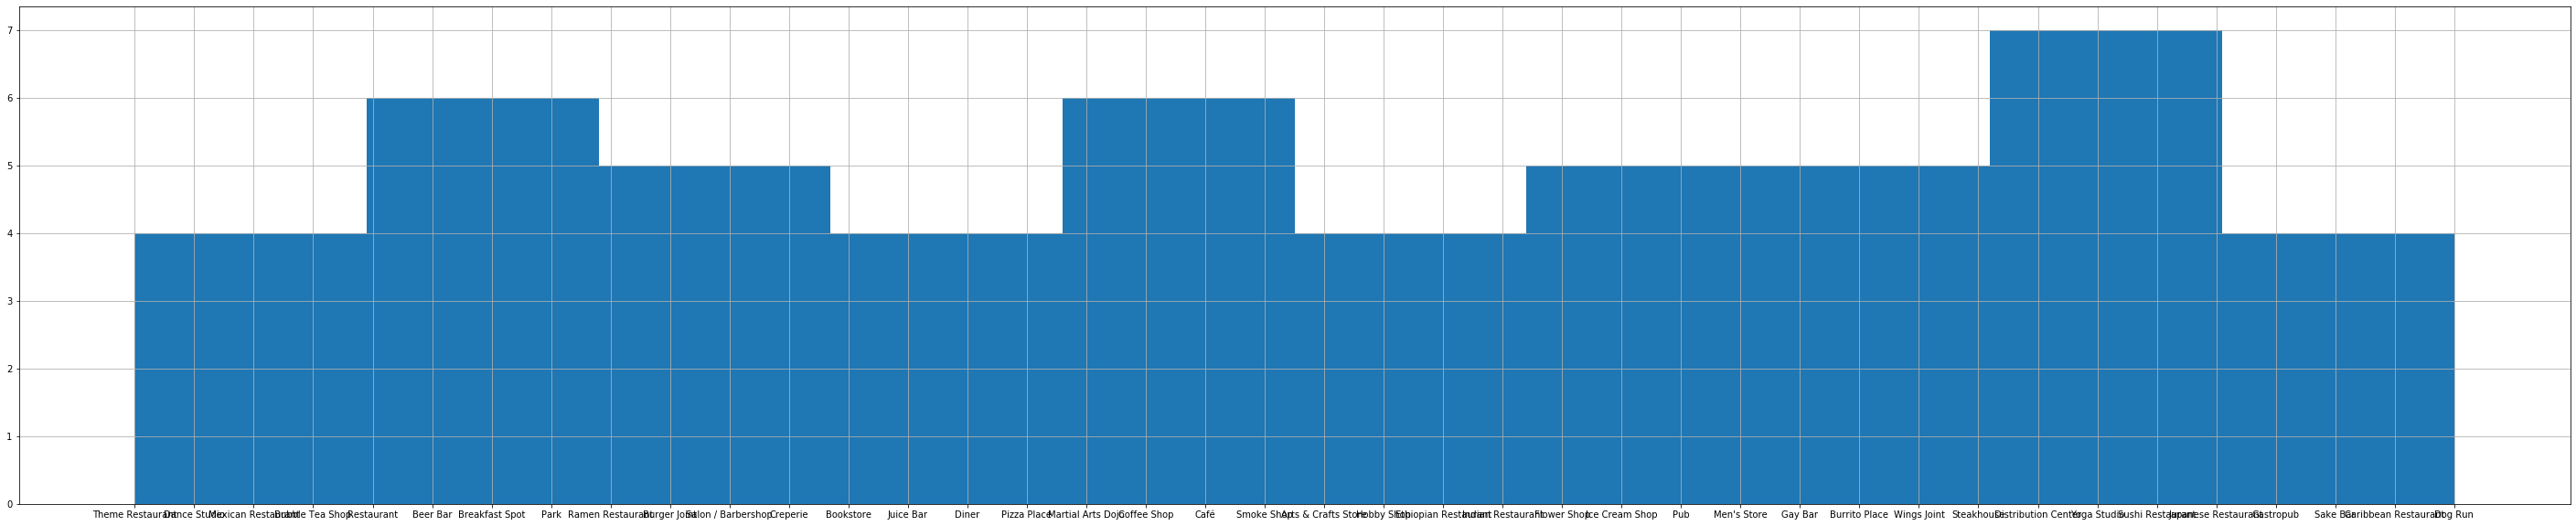

In [127]:
nearby_venues['categories'].hist(figsize = (50,10))
nearby_venues.groupby(['categories'],as_index=False).count()
mode_ven=nearby_venues['categories'].mode()

In [63]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

NameError: name 'nearby_venues' is not defined

## 2. Explore Neighborhoods in Downtown Toronto

In [64]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )  

NameError: name 'toronto_data' is not defined

### Venues in Toronto

In [65]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )  

NameError: name 'toronto_data' is not defined

## Dataframe with venues in Downtown Toronto

In [66]:
print(toronto_venues.shape)
toronto_venues.head()

NameError: name 'toronto_venues' is not defined

### Let's check how many venues per neighborhood

In [67]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

NameError: name 'toronto_venues' is not defined

In [68]:
toronto_venues.groupby('Neighborhood').count()

NameError: name 'toronto_venues' is not defined

#### Let's find out how many unique categories can be curated from all the returned venues

In [69]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

NameError: name 'toronto_venues' is not defined

## 3. Analyze Each Neighborhood

In [70]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

NameError: name 'toronto_venues' is not defined

And let's examine the new dataframe size.

In [71]:
toronto_onehot.shape

NameError: name 'toronto_onehot' is not defined

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [72]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

NameError: name 'toronto_onehot' is not defined

In [73]:
toronto_grouped.shape

NameError: name 'toronto_grouped' is not defined

#### Let's print 5 neighborhoods along with the top 5 most common venues

In [74]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood'].head():
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

NameError: name 'toronto_grouped' is not defined

#### Let's put that into a *pandas* dataframe

In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [76]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] =toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

NameError: name 'toronto_grouped' is not defined

## Clustering Neighborhoods

In [77]:
# set number of clusters
kclusters = 7

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

NameError: name 'toronto_grouped' is not defined

## new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

TypeError: 'tuple' object is not callable

In [78]:
# add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

NameError: name 'toronto_data' is not defined

## visualizing the resulting clusters

In [79]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'toronto_merged' is not defined

## CLUSTER 1

In [80]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined

## CLUSTER 2

In [81]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined

## CLUSTER 3

In [82]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined

## CLUSTER 4

In [83]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined

## CLUSTER 5

In [84]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined

In [85]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined